**Author:** Volokzhanin Vadim<br>
**Date create:** 17.02.2023<br>
**Repository:** https://github.com/VolokzhaninVadim/books/tree/master/python_geospatial_developmen<br>
**Task description:** Получить данные о населении в г. Москва и показать типовые операции в Postgres<br>

[Образ для работы](https://github.com/VolokzhaninVadim/jupyterlab)

Перевести на английский!!!

# Схема работы 

In [9]:
# Создаем диаграмму
from diagrams import Diagram
from diagrams.programming.language import Python
from diagrams.onprem.database import Postgresql

with Diagram("Процесс работы с данными", filename='./img/data_process', show=False, direction="TB"):
    Python("Получение домов") >> Python("Геокодирование домов") >> Python("Получение полигона") \
    >> Postgresql("Анализ данных")

![](./img/data_process.png)

In [ ]:
# Схема с отправкой запросов

# Создаем объекты базы данных

[Установка базы данных: Postgres + PostGIS](https://github.com/VolokzhaninVadim/postgres)

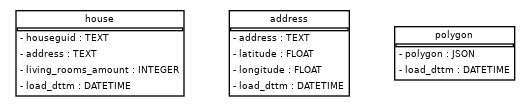

In [3]:
# Отображаем схему данных
from src.database import metadata
from sqlalchemy_schemadisplay import create_schema_graph
from IPython.display import Image, display

graph = create_schema_graph(metadata=metadata,
   show_datatypes=True, 
   concentrate=True 
)
plt = Image(graph.create_png())
display(plt)

In [1]:
# Создаем объекты базы данных
from src.database import Database 
database = Database()
from src.database import table_house, table_address, table_polygon

table_house.create(bind=database.engine, checkfirst=True)
table_address.create(bind=database.engine, checkfirst=True)
table_polygon.create(bind=database.engine, checkfirst=True)

# Проверяем смену IP

In [9]:
# Проверяем смену IP
from src.scraper import Scraper
scraper = Scraper()
current_ip = scraper.check_ip(scraper.change_session_ip())
current_ip

{'ip': '109.70.100.30'}

# Получаем дома с квартирами города Москвы

<iframe
  src="https://www.reformagkh.ru/"
  width="100%"
  height="500px"
>
</iframe>

In [1]:
# Получаем дома с квартирами и записываем их в базу данных 
from src.scraper import Scraper
scraper = Scraper()
scraper.insert_house_df()

# Получаем координаты адресов домов Московской области

<iframe
  src="https://yandex.ru/maps/213/moscow/?ll=37.617700%2C55.755863&z=10"
  width="100%"
  height="500px"
>
</iframe>

In [1]:
# Получаем дома из базы данных
from src.database import Database 
database = Database()
df = database.get_house_df()
df[df['address'].str.contains('Шаболовка')].head()

,houseguid,address,living_rooms_amount
3066,7dcee7cd-3687-4b5a-96c8-b269b91b9ee2,Шаболовка ул. 59 к.1,56
3067,0969a805-3aab-4e67-9152-9f0fcfa0ef58,Шаболовка ул. 59 к.2,60
3068,90dd2a8b-c729-4c5d-871d-1d7ca1d13de8,Шаболовка ул. 63 к.1,64
3069,16a5ae72-b1b9-47a6-a9db-cb2d46b19ad9,Шаболовка ул. 63 к.2,24
3070,d1c31c1d-6f33-48e5-8652-28b041a74ca4,Шаболовка ул. 65 к.1,64


In [2]:
# Проверяем работу
from src.scraper import Scraper
sraper = Scraper()
text = '60-летия Октября просп. 12'
prepare_text = sraper.prepare_text(text)
sraper.yandex_geocoder(prepare_text)

[55.692069, 37.574606]

In [4]:
# Вставляем данные
from src.scraper import Scraper
scraper = Scraper()
scraper.insert_table_address_from_df()

  5%|▌         | 1340/24568 [3:04:51<44:19:34,  6.87s/it]   

In [ ]:
# Очистить координаты не из Москвы, передавать адрес: Россия, Москва, *

# Получаем полигон "Москва, Южный административный округ"

<iframe
  src="https://nominatim.openstreetmap.org/ui/search.html"
  width="100%"
  height="500px"
>
</iframe>

In [1]:
# Сохраняем полигон
from src.scraper import Scraper
scraper = Scraper()
scraper.insert_table_polygon()

# База данных
Показать примеры. 
Описать код. 

# Дополнительный материал
1. [Разработка геоприложений на языке Python](https://www.ozon.ru/product/razrabotka-geoprilozheniy-na-yazyke-python-217051313) - знания о геоприложения. 
1. [Современный скрапинг веб-сайтов с помощью Python. 2-е межд. издание](https://www.ozon.ru/product/sovremennyy-skraping-veb-saytov-s-pomoshchyu-python-pdf-epub-mitchell-rayan-254474872) - знания о возможностях скрапинга сайтов. 
1. [Изучаем PostgreSQL 10](https://www.ozon.ru/product/izuchaem-postgresql-10-salahaldin-dzhuba-volkov-andrey-217051141) - знания о Postgres. 
1. [Использование Docker](https://www.ozon.ru/product/ispolzovanie-docker-mouet-edrien-217051397) - знания о Docker. 
1. [OSINT](https://adeo.workplace.com/groups/437833833524196/permalink/1064658360841737/) - знания об OSINT. 